## Task 4 - Model Comparison

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

The following commands can be run to execute the scripts to generate the results from each of our models. This has been been done and results have been stored for 200 episodes of gameplay for each model. These results have been saved in a file called 'task3_results.csv', which is loaded into a pandas dataframe below.

The three models evaluated in this task are as follows:

- Task 1: State-based MLP
- Task 2: Image-based MLP
- Task 3: Reinforcement learning DQN agent (State-based)

##### Task 1 - State-based player

In [1]:
!python ./lunar_lander_ml_states_player.py

##### Task 2 - Image-based player

In [2]:
!python ./lunar_lander_ml_images_player.py

##### Task 3 - Reinforcement learning agent

In [3]:
!python ./lunar_lander_dl_player.py

### Reading results from the three tasks

In [11]:
results=pd.read_csv('task3_results.csv')
results.head() # display a few rows

,States Learner,Images Learner,Reinforcement Learning
0,252.475660,-257.563637,-268.795
1,241.754470,-190.155444,-114.814
2,235.569807,-228.973500,-311.657
3,197.339117,-321.859749,-192.621
4,232.854227,-175.621428,99.420


In [32]:
pd.DataFrame({"Mean Score":results.mean()})

,Mean Score
States Learner,226.993230
Images Learner,-356.075079
Reinforcement Learning,-144.185890


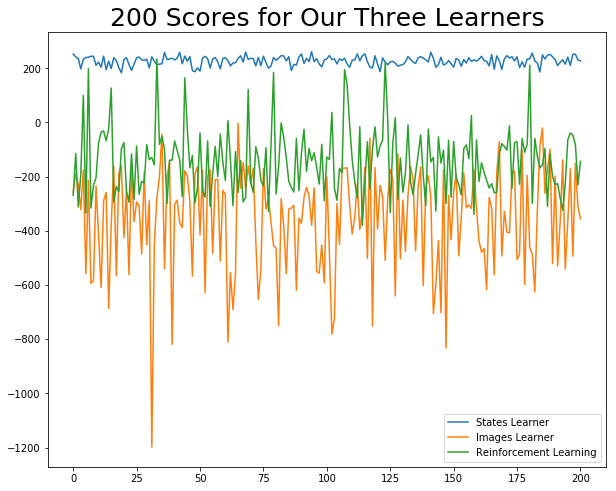

In [30]:
result_plot=results.plot()
result_plot.figure.set_size_inches(10,8)
result_plot.title.set_text("200 Scores for Our Three Learners")
result_plot.title.set_size(25)

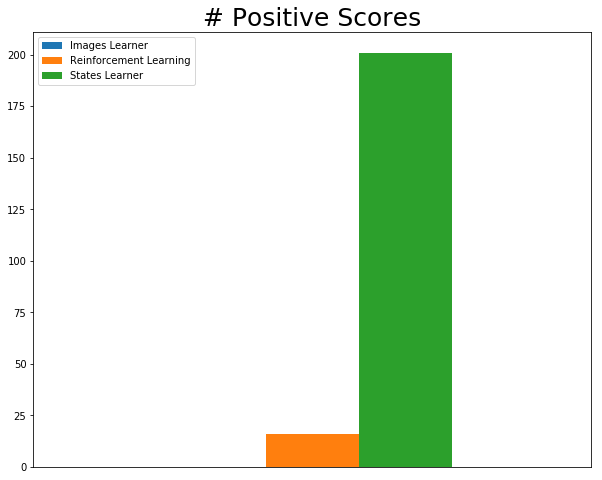

In [55]:
# dictionary = { learner : num positive scores}
num_positives={title : [results[title][results[title]>0].count()] for title in list(results)}

num_positives_plot = pd.DataFrame(num_positives).plot(kind='bar', title="# Positive Scores", figsize=(10,8))
num_positives_plot.title.set_size(25)
num_positives_plot.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

## Results

We can see from the above results that there is a clear winner in terms of score for the three models our team has created, the state-based MLP from task 1. It is also clear that the reinforcement learning approach is in second place, with some of its scores reaching levels close to that of the image-based MLP. The image-based MLP is clearly the poorest performing approach, it is outperformed by the other two approaches the majority of the time and did not achieve a positive score in of the 200 games.

While both the states-based MLP and the reinforcement learning approach tackle the problem using states, the MLP performs better as it has expert states to learn from. The reinforcement approach has to learn to play the game from scratch and only has its own previous moves to learn from, this proves to be a far more difficult challenge. With more computation power and time, we could see the reinforcment approach overtaking the states-based MLP for the top spot as it should learn to be better with more data. Also, this approach could benefit from more experimentation with hyper-parameter combinations to find an optimal set for this problem.

The performance of the image-based MLP tells us a lot about the difficulty of training a model on image data. Our approach evaluated a range of different architectures (CNN, SLP, DFNN, and MLP), which are powerful neural network structures capable of solving very difficult problems. Even when learning from images of an expert player, our best image-based approach didn't manage to achieve a positive score in the 200 episodes tested above. Again, with more computation power and time this approach should improve. As well as the advantages of having more data and hyper-parameter combinations, this could allow us to carry out this approach using unshrunken images or ones in colour. It would be interesting to see how these changes in the structure of the data could influence the scores achieved by the model. 